In [2]:
pip install scikit-fuzzy

Giá trị nguy cơ (0-100): 74.43804034582135


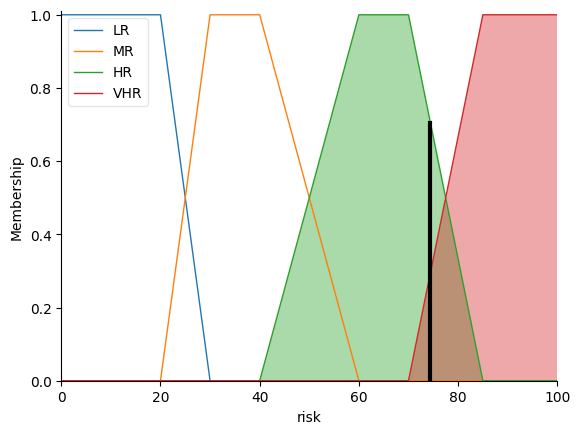

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

blood_sugar = ctrl.Antecedent(np.arange(0, 301, 1), 'blood_sugar')
bmi         = ctrl.Antecedent(np.arange(10, 41, 1), 'bmi')
urination   = ctrl.Antecedent(np.arange(0, 11, 1), 'urination')
fatigue     = ctrl.Antecedent(np.arange(0, 11, 1), 'fatigue')
risk        = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

blood_sugar['low']       = fuzz.trapmf(blood_sugar.universe, [0, 0, 70, 80])
blood_sugar['normal']    = fuzz.trapmf(blood_sugar.universe, [70, 80, 120, 130])
blood_sugar['high']      = fuzz.trapmf(blood_sugar.universe, [110, 120, 200, 210])
blood_sugar['very_high'] = fuzz.trapmf(blood_sugar.universe, [190, 200, 300, 300])

bmi['underweight'] = fuzz.trapmf(bmi.universe, [10, 10, 17, 18.5])
bmi['normal']      = fuzz.trapmf(bmi.universe, [17, 18.5, 24.9, 26])
bmi['overweight']  = fuzz.trapmf(bmi.universe, [24, 25, 29, 30])
bmi['obese']       = fuzz.trapmf(bmi.universe, [29, 30, 40, 40])

urination['rarely']     = fuzz.trapmf(urination.universe, [0, 0, 2, 4])
urination['sometimes']  = fuzz.trapmf(urination.universe, [2, 4, 6, 8])
urination['often']      = fuzz.trapmf(urination.universe, [6, 8, 10, 10])

fatigue['low']    = fuzz.trapmf(fatigue.universe, [0, 0, 3, 5])
fatigue['medium'] = fuzz.trapmf(fatigue.universe, [3, 5, 6, 8])
fatigue['high']   = fuzz.trapmf(fatigue.universe, [6, 8, 10, 10])

risk['LR']  = fuzz.trapmf(risk.universe, [0, 0, 20, 30])
risk['MR']  = fuzz.trapmf(risk.universe, [20, 30, 40, 60])
risk['HR']  = fuzz.trapmf(risk.universe, [40, 60, 70, 85])
risk['VHR'] = fuzz.trapmf(risk.universe, [70, 85, 100, 100])

rule1 = ctrl.Rule(blood_sugar['very_high'] & urination['often'],      risk['VHR'])
rule2 = ctrl.Rule(blood_sugar['very_high'] & urination['sometimes'],  risk['HR'])
rule3 = ctrl.Rule(blood_sugar['high']      & urination['often'],      risk['HR'])
rule4 = ctrl.Rule(blood_sugar['normal']    & urination['rarely'],     risk['LR'])

rule5 = ctrl.Rule(blood_sugar['very_high'] & bmi['obese'],           risk['VHR'])
rule6 = ctrl.Rule(blood_sugar['very_high'] & bmi['overweight'],      risk['HR'])
rule7 = ctrl.Rule(blood_sugar['high']      & bmi['overweight'],      risk['HR'])
rule8 = ctrl.Rule(blood_sugar['high']      & bmi['overweight'],      risk['HR'])
rule9 = ctrl.Rule(blood_sugar['normal']    & bmi['normal'],          risk['LR'])

rule10 = ctrl.Rule(blood_sugar['very_high'] & fatigue['high'],       risk['VHR'])
rule11 = ctrl.Rule(blood_sugar['high']      & fatigue['high'],       risk['HR'])
rule12 = ctrl.Rule(blood_sugar['normal']    & fatigue['medium'],     risk['MR'])
rule13 = ctrl.Rule(blood_sugar['normal']    & fatigue['low'],        risk['LR'])

rules = [rule1, rule2, rule3, rule4,
         rule5, rule6, rule7, rule8, rule9,
         rule10, rule11, rule12, rule13]

risk_ctrl = ctrl.ControlSystem(rules)
risk_sim  = ctrl.ControlSystemSimulation(risk_ctrl)

risk_sim.input['blood_sugar'] = 210
risk_sim.input['bmi']         = 28
risk_sim.input['urination']   = 8
risk_sim.input['fatigue']     = 7

risk_sim.compute()

print("Giá trị nguy cơ (0-100):", risk_sim.output['risk'])
risk.view(sim=risk_sim)
